In [186]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sample_size = 500

x = np.random.uniform(-20, 20, sample_size).reshape(-1, 1)
y = x**4 + x**3 + x**2 + x + np.random.normal(0, 10, sample_size).reshape(-1, 1)

print(x.shape, y.shape)

plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='red')
#plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size =0.7, test_size=0.3)


models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]

for m in models:
    m.fit(x_train, y_train)
    print(m.__class__)
    print(r2_score(y_train, m.predict(x_train)))
    print(r2_score(y_test, m.predict(x_test)))
    

(500, 1) (500, 1)
<class 'sklearn.linear_model.base.LinearRegression'>
0.0283777235436
-0.0617858892415
<class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>
-0.392900747866
-0.30431829499
<class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>
0.660804204872
0.59980194264
<class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>
0.92684929777
0.920185192685
<class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>
0.991719741159
0.993990888503


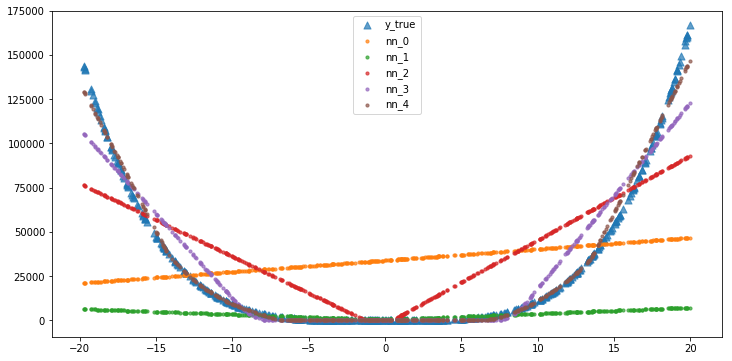

In [211]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, marker='^', s=50, alpha=0.7, label='y_true')
for i, m in enumerate(models):
    plt.scatter(x, m.predict(x), marker='o', s=10, alpha=0.7, label='nn_{}'.format(i))
plt.legend()
plt.savefig('../../assets/images/markdown_img/180607_1614_nn_scatter.svg')
plt.show()



In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

models = [LinearRegression(), 
          MLPRegressor(hidden_layer_sizes=[48, 8]), 
          ElasticNet(),
          GridSearchCV(
              ElasticNet(), {'alpha':[0.005, 0.05, 0.5, 1.0], 'l1_ratio':[0.005, 0.05, 0.5, 1.0]}
          ),
         ]
for m in models:
    m.fit(x_train, y_train)
    print(m.__class__)
    print("train: {}, test: {}".format(r2_score(y_train, m.predict(x_train)), r2_score(y_test, m.predict(x_test))))

In [106]:
x = pd.DataFrame({
    "x1": np.random.normal(0, 1, sample_size), 
    'x2': np.random.normal(2, 3, sample_size), 
})

y = x['x1'] + x['x2']

from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
model.fit(x, y)
model.score(x, y)

0.99905465229446677

In [ ]:
import numpy as np 


np.random.seed(3)
n = 200
x = np.random.uniform(-15, 15, size = n)
y = x**3 + x**2 + 2*np.random.randn(n, )


plt.scatter(x, y)